# Regression and Gradient Descent

## Index

- [Simple Linear Regression](#simple-linear-regression)
- [Multiple Linear Regression](#multiple-linear-regression)
- [Gradient Regression](#gradient-regression)

## Simple Linear Regression

It's a mathematical function that can have one or more parameters with it's coefficients:

$$ y = a + xb + zc + ...$$
Where x, z are parameters and a, b, c are coefficients

The meaning is there is a lineal relation between some parameters and ``y``, with that in mind, a simple linear regression is

In [ ]:
import numpy as np

# Step 1: Get a data set
x = np.array([a for a in range(1,6)])
y = np.array([2, 4, 5, 4, 5])

# Computing the mean of x and y
mean_x = x.mean()
mean_y = y.mean()

# Calculating the coefficients for a 2 D dimension (y = m*x + c)
m = np.sum((x - mean_x) * (y - mean_y)) / np.sum((x-mean_x)**2)
c = mean_y - m * mean_x

print(f'Model: y = {c} + {m}*x')

Model: y = 2.2 + 0.6*x


### Visualizing the lineal regression


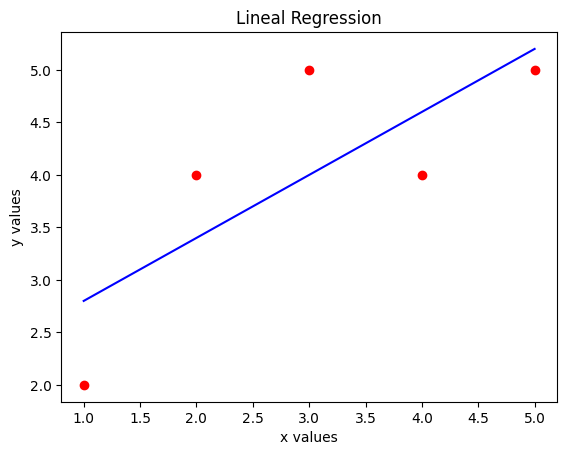

In [9]:
import matplotlib.pyplot as plt
plt.scatter(x,y, c='r', marker='o')

y_predict = c + m*x
plt.plot(x, y_predict, c='b')

# Plot configuration
plt.title("Lineal Regression")
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

## Multiple Linear Regression

Recently we saw a simple linear regression, where the prediction only depends on 1 parameter `x`, but, if you want to predict for example the houses prices, then the price is going to depend on many factors, such as location, size, number of rooms, etc. The Multiple Linear Regression accounts for these simultaneous factors. Usually is represented as a matrix
$$

\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
=
\begin{bmatrix}
1 & x_{1,1} & x_{1,2} & \cdots & x_{1,m} \\
1 & x_{2,1} & x_{2,2} & \cdots & x_{2,m} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n,1} & x_{n,2} & \cdots & x_{n,m}
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_m
\end{bmatrix}
= X \cdot \beta

$$
To calculate the ``coefficients`` $ \beta = \left(X^TX\right)^{-1}X^Ty$

### Model's Performance Evaluation
Usually to calculate the performance is used the $R^2$ score

$$R^2 = 1 - \dfrac{SS_{residuals}}{SS_{Total}}$$

Where:
- $SS_{residuals} = \sum^n_{i=1}\left(y_i - \hat{y}_i\right)^2$ 
- $SS_{Total} = \sum^n_{i=1}(y_i - \bar{y})^2$
    * $\hat{y}_i$: Is the predicted value
    * $\bar{y}$: Is the mean value
    * $y_i$: Is the Original Value

A simple example of multiple linear regression

Coefficients: [-91666.66666681    146.60493827  57037.03703705]
Predicted Prices: [343333.33333329 488333.33333333 229999.99999993 633333.33333336]
R^2: 0.997113020727609


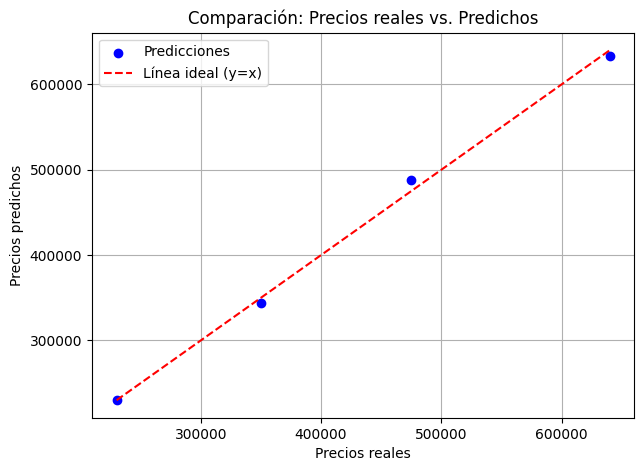

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# Data
housing_data = np.array([[1800, 3], [2400, 4], [1416, 2], [3000, 5]])
prices = np.array([350000, 475000, 230000, 640000])

# Adding ones for the intercept (beta_0)
ones = np.ones(shape=(len(housing_data), 1))
X = np.append(ones, housing_data, axis=1) # axis=0 --> rows    // axis =1 --> columns
coefficients = np.linalg.inv(X.T @ X) @ X.T @ prices

# Predicting the price
predicted_prices = X @ coefficients

# Caltulating SS residuals, totals and R2
rss = np.sum((prices - predicted_prices)**2)
tss = np.sum((prices - prices.mean())**2)

r2 = 1 - (rss/tss)

print(f'Coefficients: {coefficients}')
print(f'Predicted Prices: {predicted_prices}')
print(f'R^2: {r2}')

plt.figure(figsize=(7,5))
plt.scatter(prices, predicted_prices, color="blue", label="Predicciones")
plt.plot([prices.min(), prices.max()],
         [prices.min(), prices.max()],
         color="red", linestyle="--", label="Línea ideal (y=x)")

plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.title("Comparación: Precios reales vs. Predichos")
plt.legend()
plt.grid(True)
plt.show()

## Gradient Regression

The Gradient descent is an iterative algorithm for minimizing a function, usually a loss function, quantifying the disparity between predicted and actual results. The goal is to find parameters that minimize the value of loss function. Importantly, gradient descent navigates its way to the minimum of the function by moving iteratively toward the direction of the steepest descent. However to leverage gradient descent the target function has to be differentiable.

### Steps
1. Choose random values for initial parameters.
2. Calculate the cost (the difference between actyal predicted value)
3. Compute the gradient (the steepest slope of the function around that point)
4. Update the parameters using the gradient
5. Repeat the steps 2 to 4 until we reach an acceptable error rate or exhaust the maximum iterations

A component is the learninr rate, if its to high then we overshoot the minimum. If the step is too low the convergence to the minimum may take too long

### Cost Function

The cost function is as follows:

$$ J\left( X, y, \theta \right) = \dfrac{1}{m} \sum^m_{i=1}\left(X\cdot \theta - y_i\right)^2 $$

With the following parameters:
- ``J`` is the cost
- ``X`` is the data
- $\theta$ are the parameters
- ``y`` is the actual values
- ``m`` is the lenght of ``y``


In [12]:
import numpy as np

# Defining the cost function
def cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / m) * np.sum(np.square(predictions - y))
    return cost

### The Update Rule

To minimize the cost we have to adjust and update the parameters:

$$ \theta:= \theta - \alpha \dfrac{1}{m} X^T \cdot \left(X \cdot \theta - y\right) $$
Where:
- $\alpha$ is the learning rate, that determines the step of the learning
- $X^T$ is the traspose data


In [17]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for i in range(iterations): # Iterate until convergence
        prediction = np.dot(X,theta)  # Matrix multiplication between X and theta
        theta = theta - (1/m)*alpha*(X.T.dot((prediction - y))) # Gradient update rule
        theta_history[i,:] = theta.T
        cost_history[i] = cost(X,y,theta)
    return theta, cost_history, theta_history

In [20]:
# Applying Gradient Descent to Linear Regression
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

lr = 0.01
n_iter = 1000
theta = np.random.randn(2, 1)  # Randomly initialized parameters
X_b = np.c_[np.ones((len(X), 1)), X]  # add bias parameter to X
theta, cost_history, theta_history = gradient_descent(X_b, y, theta, lr, n_iter)
print(f'Theta parameters: {theta}\n')
print(f'Cost History: {cost_history}\n')
print(f'Theta history: {theta_history}')


Theta parameters: [[3.90347175]
 [3.13034511]]

Cost History: [46.97899422 45.05065455 43.20319777 41.43323107 39.73750397 38.11290233
 36.55644266 35.06526659 33.63663569 32.26792635 30.95662506 29.70032372
 28.49671525 27.34358934 26.23882839 25.18040366 24.16637148 23.19486971
 22.26411434 21.37239619 20.51807777 19.69959027 18.9154307  18.16415912
 17.44439598 16.75481961 16.09416376 15.46121532 14.85481206 14.27384048
 13.71723383 13.18397006 12.67307004 12.18359567 11.71464822 11.26536667
 10.83492609 10.42253618 10.02743978  9.64891148  9.28625632  8.93880847
  8.60593005  8.28700993  7.98146261  7.68872714  7.40826614  7.13956472
  6.88212963  6.63548829  6.39918794  6.17279483  5.95589338  5.74808547
  5.54898966  5.35824052  5.17548794  5.00039651  4.83264487  4.67192516
  4.51794243  4.37041408  4.22906939  4.09364899  3.96390438  3.83959751
  3.72050027  3.60639417  3.49706984  3.39232672  3.29197267  3.19582357
  3.10370306  3.01544218  2.93087902  2.8498585   2.77223203  